In [11]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [3]:
model = ResNet50(weights = 'imagenet')

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 29s 0us/step


In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [36]:
url_img_cat = 'https://royalcanin.pl/blog/wp-content/uploads/2018/01/Kot-w-domu-4-rzeczy-kt%C3%B3rych-mo%C5%BCe-Ci%C4%99-nauczy%C4%87-950x633.jpeg'
url_img_bill = 'https://a1cf74336522e87f135f-2f21ace9a6cf0052456644b80fa06d4f.ssl.cf2.rackcdn.com/images/characters/p-gravity-falls-cipher.jpg'
url_img_xi = 'https://upload.wikimedia.org/wikipedia/commons/e/e2/Xi_Jinping_in_2016.jpg'
url_img = 'https://www.heliguy.com/downloads/1510825979do-i-need-a-drone-license.jpeg'

![](https://royalcanin.pl/blog/wp-content/uploads/2018/01/Kot-w-domu-4-rzeczy-kt%C3%B3rych-mo%C5%BCe-Ci%C4%99-nauczy%C4%87-950x633.jpeg)

In [37]:
response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize((224, 224))

In [38]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X.shape

(1, 224, 224, 3)

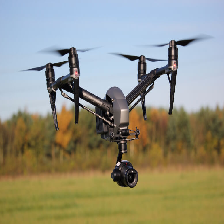

In [39]:
img

In [40]:
y_pred = model.predict(X)

In [41]:
decode_predictions(y_pred, top=3)

[[('n03532672', 'hook', 0.48357642),
  ('n03967562', 'plow', 0.09562234),
  ('n03792782', 'mountain_bike', 0.043863557)]]